In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#load the dataset
vid = pd.read_csv("/content/SframePSNR52.csv")
#show the data
vid.head()

,lossclass,Condition,Framecount,42,41,40,39,42/F,41/F,40/F,39/F
0,0,1100,6622,6074,6045,5818,5709,0.917246,0.912866,0.878587,0.862126
1,1,1100,6622,6048,5861,5793,5681,0.913319,0.885080,0.874811,0.857898
2,2,1100,6622,6159,6128,5912,5815,0.930082,0.925400,0.892782,0.878133
3,3,1100,6622,5883,5837,5708,5626,0.888402,0.881456,0.861975,0.849592
4,4,1100,6622,6092,5903,5855,5744,0.919964,0.891423,0.884174,0.867412


In [ ]:
train = vid

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train[['42/F','41/F','40/F','39/F','Condition']] = scaler.fit_transform(train[['42/F','41/F','40/F','39/F','Condition']])

In [ ]:
from sklearn.model_selection import train_test_split
X = train[['42/F','41/F','40/F','39/F','Condition']]
y = train.lossclass

In [ ]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(255, 5)
(255,)
(45, 5)
(45,)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.utils import to_categorical
from keras.callbacks import CSVLogger
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation, BatchNormalization

optimizer = 'RMSProp'

model = Sequential()

model.add(Dense(128,input_dim=5,activation='relu',name="d1"))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu',name="d2"))
model.add(Dropout(0.3))
'''model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))'''
'''model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))'''
model.add(Dense(6,activation='softmax',name="o"))

model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1 (Dense)                   (None, 128)               768       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
d2 (Dense)                   (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
o (Dense)                    (None, 6)                 774       
Total params: 18,054
Trainable params: 18,054
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = [
    ModelCheckpoint('model_best.hdf5',
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
]
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[checkpoint],epochs=100, batch_size=3)

Epoch 1/100
59/85 [===================>..........] - ETA: 0s - loss: 1.8187 - accuracy: 0.1582
Epoch 00001: val_accuracy improved from -inf to 0.08889, saving model to model_best.hdf5
85/85 [==============================] - 0s 4ms/step - loss: 1.8136 - accuracy: 0.1843 - val_loss: 1.8168 - val_accuracy: 0.0889
Epoch 2/100
59/85 [===================>..........] - ETA: 0s - loss: 1.7629 - accuracy: 0.2147
Epoch 00002: val_accuracy improved from 0.08889 to 0.15556, saving model to model_best.hdf5
85/85 [==============================] - 0s 2ms/step - loss: 1.7876 - accuracy: 0.2078 - val_loss: 1.8071 - val_accuracy: 0.1556
Epoch 3/100
78/85 [==========================>...] - ETA: 0s - loss: 1.7693 - accuracy: 0.2051
Epoch 00003: val_accuracy did not improve from 0.15556
85/85 [==============================] - 0s 2ms/step - loss: 1.7720 - accuracy: 0.2000 - val_loss: 1.8318 - val_accuracy: 0.1556
Epoch 4/100
75/85 [=========================>....] - ETA: 0s - loss: 1.7463 - accuracy: 0.21

In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
'''model.load_weights('model_best.hdf5')
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])'''
stop = EarlyStopping(monitor='val_accuracy',  patience=80, verbose=0, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=25, verbose=1,
    factor=0.5,
    min_lr = 0.00001,
    cooldown=0
)
checkpoint = [ModelCheckpoint('model_best.hdf5',monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
]
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[checkpoint,reduce_lr,stop],epochs=500, batch_size=2)

Epoch 1/500
109/128 [========================>.....] - ETA: 0s - loss: 1.5273 - accuracy: 0.2936
Epoch 00001: val_accuracy improved from -inf to 0.13333, saving model to model_best.hdf5
128/128 [==============================] - 0s 3ms/step - loss: 1.5331 - accuracy: 0.2941 - val_loss: 1.9023 - val_accuracy: 0.1333
Epoch 2/500
101/128 [======================>.......] - ETA: 0s - loss: 1.5427 - accuracy: 0.2871
Epoch 00002: val_accuracy improved from 0.13333 to 0.28889, saving model to model_best.hdf5
128/128 [==============================] - 0s 2ms/step - loss: 1.5289 - accuracy: 0.2863 - val_loss: 1.6570 - val_accuracy: 0.2889
Epoch 3/500
126/128 [============================>.] - ETA: 0s - loss: 1.5286 - accuracy: 0.2897
Epoch 00003: val_accuracy did not improve from 0.28889
128/128 [==============================] - 0s 2ms/step - loss: 1.5251 - accuracy: 0.2863 - val_loss: 1.6783 - val_accuracy: 0.2667
Epoch 4/500
104/128 [=======================>......] - ETA: 0s - loss: 1.5102 - 

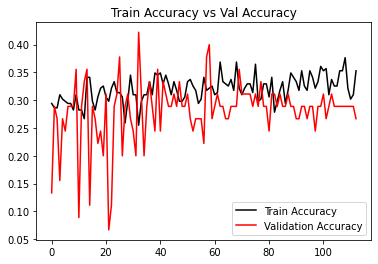

In [ ]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='black')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.show()

In [ ]:
pr = model.predict(X, batch_size=3, verbose=0, steps=None)
pp = pr.argmax(axis=1)
yp = []
for i in pp:
  if i == 0:
    yp.append(0.001)
  elif i == 1:
    yp.append(0.01)
  elif i == 2:
    yp.append(0.025)
  elif i == 3:
    yp.append(0.05)
  elif i == 4:
    yp.append(0.1)
  else:
    yp.append(0.25)

In [ ]:
yt = []
for i in y:
  if i == 0:
    yt.append(0.001)
  elif i == 1:
    yt.append(0.01)
  elif i == 2:
    yt.append(0.025)
  elif i == 3:
    yt.append(0.05)
  elif i == 4:
    yt.append(0.1)
  else:
    yt.append(0.25)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yt, yp)

0.04105

In [ ]:
issue = pd.read_csv("/content/issueframePSNRs.csv")

In [ ]:
issue.head()

,Unnamed: 0,name,Condition,Frame,42,41,40,39,42/F,41/F,40/F,39/F
0,0,L:/Videodata/issue/received/0.mp4,1200,6114,5901,5872,5860,5851,0.965162,0.960419,0.958456,0.956984
1,1,L:/Videodata/issue/received/1.mp4,1300,6114,5243,5100,5050,5032,0.857540,0.834151,0.825973,0.823029
2,2,L:/Videodata/issue/received/2.mp4,1300,6114,6069,6068,6064,6062,0.992640,0.992476,0.991822,0.991495
3,3,L:/Videodata/issue/received/3.mp4,1300,6114,5729,5686,5668,5649,0.937030,0.929997,0.927053,0.923945
4,4,L:/Videodata/issue/received/4.mp4,1300,6114,6069,6068,6064,6062,0.992640,0.992476,0.991822,0.991495


In [ ]:
X_issue = issue[['42/F','41/F','40/F','39/F','Condition']]

In [ ]:
scaler = MinMaxScaler()
X_issue[['42/F','41/F','40/F','39/F','Condition']] = scaler.fit_transform(X_issue[['42/F','41/F','40/F','39/F','Condition']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
pr = model.predict(X_issue, batch_size=3, verbose=0, steps=None)

In [ ]:
pp = pr.argmax(axis=1)
pp

array([0, 0, 5, 0, 5, 5, 5, 5, 5, 5])

In [ ]:
yp = []
for i in pp:
  if i == 0:
    yp.append(0.001)
  elif i == 1:
    yp.append(0.01)
  elif i == 2:
    yp.append(0.025)
  elif i == 3:
    yp.append(0.05)
  elif i == 4:
    yp.append(0.1)
  else:
    yp.append(0.25)
yp

[0.001, 0.001, 0.25, 0.001, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]